**Workshop**

Student-t, Lognormal

## Import libraries

In [5]:
# load data
import yfinance as yf

# Visualization
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# preprocessing
import pandas as pd
import numpy as np

mpl.rcParams['figure.figsize'] = (12.0, 8.0)
sns.set_style("white")

## Load data

In [3]:
start = "2010-01-01"
end = "2022-06-8"

df_daily = yf.download(tickers='AAPL', interval = '1d', start=start, end=end)
df_daily['return'] = df_daily.Close.pct_change()

df_daily

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800,0.006648
...,...,...,...,...,...,...,...
2022-06-01,149.899994,151.740005,147.679993,148.710007,148.257782,74286600,-0.000873
2022-06-02,147.830002,151.270004,146.860001,151.210007,150.750183,72348100,0.016811
2022-06-03,146.899994,147.970001,144.460007,145.380005,144.937912,88570300,-0.038556


## Distribution

### Normalization

In [4]:
fig = px.histogram(df_daily, x='return', title='Daily return of AAPL')
# 1SD
fig.add_vline(x=df_daily['return'].mean() + df_daily['return'].std(), line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=df_daily['return'].mean() - df_daily['return'].std(), line_width=3, line_dash="dash", line_color="green")
# 2SD
fig.add_vline(x=df_daily['return'].mean() + df_daily['return'].std() * 2, line_width=3, line_dash="dash", line_color="orange")
fig.add_vline(x=df_daily['return'].mean() - df_daily['return'].std() * 2, line_width=3, line_dash="dash", line_color="orange")
# 3SD
fig.add_vline(x=df_daily['return'].mean() + df_daily['return'].std() * 3, line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x=df_daily['return'].mean() - df_daily['return'].std() * 3, line_width=3, line_dash="dash", line_color="red")
fig.show()

### VaR (Value at Risk)

Method of Calculating VaR
- Historical VaR
- Variance-Covariance Method
- Monte Carlo

Reference: https://www.investopedia.com/articles/04/092904.asp

In [6]:
df = yf.download(tickers='BTC-USD', interval = '1D')

df['return'] = df['Close'].pct_change()
df.dropna(inplace=True)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,0.008352


**VaR Historical**

In [7]:
# Calculate VaR Historical
var_hist = np.percentile(df['return'], 1)
print(f"Percentile 1 = {var_hist}")

Percentile 1 = -0.10571544385299114


**Var Covariance**

In [8]:
# Calculate VaR Covariance
# two-tailed: 1.65 = 0.10, 1.96 = 0.05, 2.58 = 0.01 (/2 = 0.005)
# one-tailed: 2.33 = 0.01
var_co = -2.33 * df['return'].std()
var_co

-0.08940212259941756

In [9]:
fig = px.histogram(df, x='return', title='Daily return of BTC')
# 1SD
fig.add_vline(x=var_hist, line_width=3, line_dash="dash", line_color="red", annotation_text='VaR Hist')

fig.add_vline(x=var_co, line_width=3, line_dash="dash", line_color="black", annotation_text='VaR Co')
fig.show()

In [16]:
import scipy.stats as scs

percs = np.array([0.01, 0.1, 1., 2.5, 5.0, 10.0])
VaR = scs.scoreatpercentile(df['return'], percs)

def print_var():
    print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
    print(33 * '-')
    for pair in zip(percs, VaR):
         print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

print_var()

Confidence Level    Value-at-Risk
---------------------------------
           99.99            0.323
           99.90            0.182
           99.00            0.106
           97.50            0.078
           95.00            0.060
           90.00            0.037


**Monte Carlo**

In [10]:
mu = df['return'].mean()
sigma = df['return'].std()

rand = np.random.normal(loc=mu, scale=sigma, size=365*8)
var_monte_carlo = np.percentile(rand, 1)

print(f'mu: {mu:.3f}')
print(f'std: {sigma:.3f}')

mu: 0.002
std: 0.038


Text(0.1, 0.3, 'VaR Monte Carlo: -8.52%')

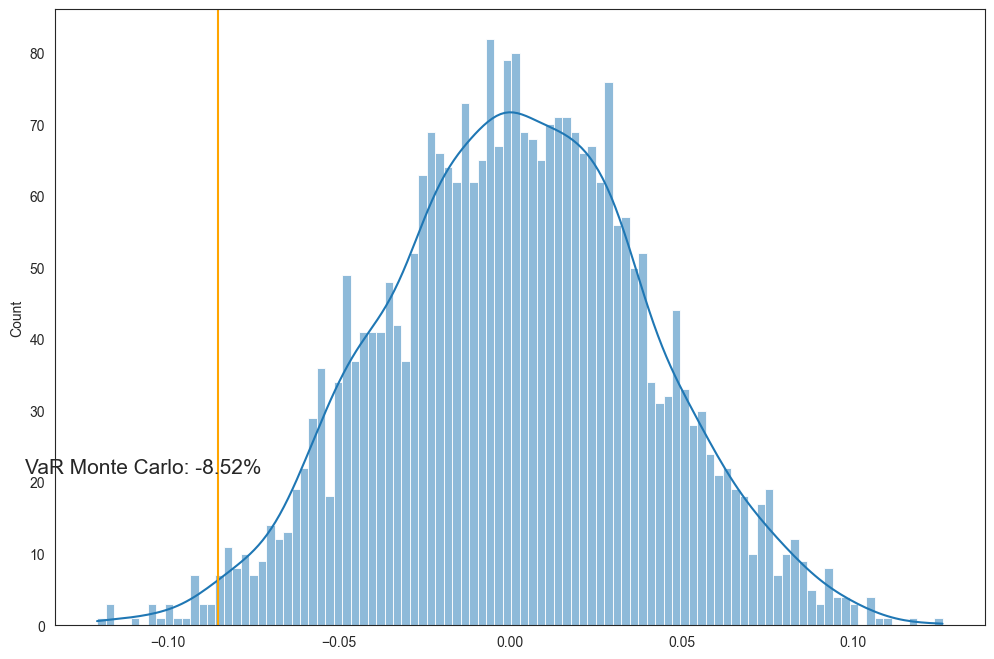

In [11]:
sns.histplot(rand,bins=100,kde=True)
plt.axvline(var_monte_carlo,color='orange')
plt.figtext(0.1, 0.3, f"VaR Monte Carlo: {var_monte_carlo:.2%}" ,fontsize=15)

Text(0.5, 1.0, 'BTC daily return between 2010-01-01 to 2022-06-8')

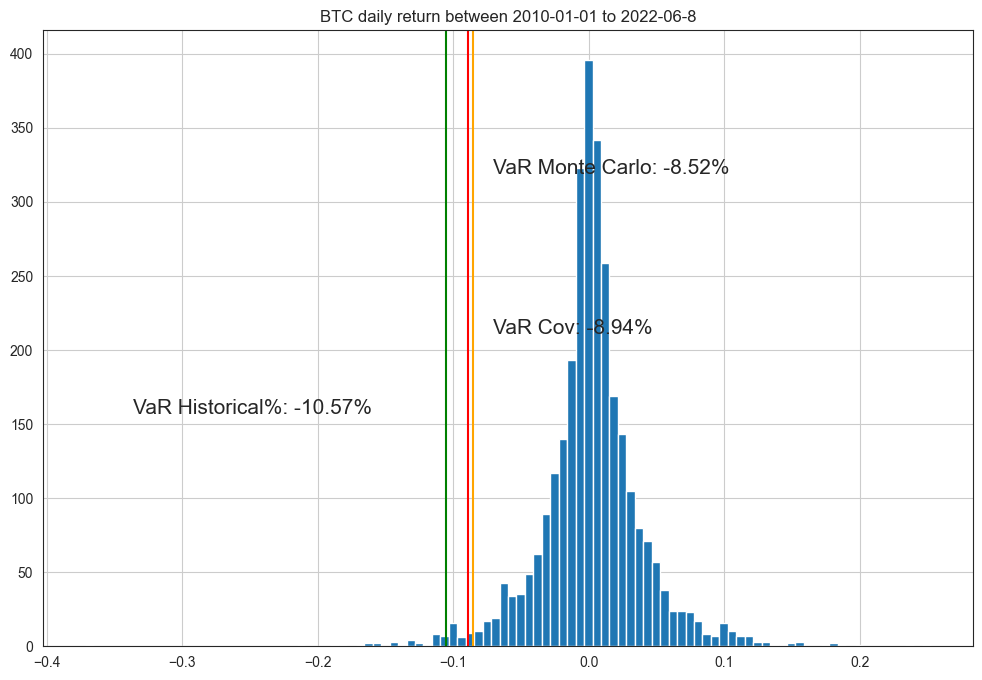

In [17]:
df.Close.pct_change().hist(bins=100)

plt.axvline(var_co,color='red')
plt.figtext(0.5, 0.5, f"VaR Cov: {var_co:.2%}" ,fontsize=15)

plt.axvline(var_hist,color='green')
plt.figtext(0.2, 0.4, f"VaR Historical%: {var_hist:.2%}" ,fontsize=15)

plt.axvline(var_monte_carlo,color='orange')
plt.figtext(0.5, 0.7, f"VaR Monte Carlo: {var_monte_carlo:.2%}" ,fontsize=15)

plt.title(f'BTC daily return between {start} to {end}')